In [1]:
from stesml.model_tools import build_train_test_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data
from stesml.data_tools import get_scenario_index
from stesml.data_tools import get_train_and_test_index

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error
from stesml.plot_tools import plot_progress_results

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = "../data/Sulfur_Models/"
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True
n_shuffles = 1

In [3]:
parameters = {'n_layers': 5, 'n_hidden_units': 86, 'batch_size': 180, 'epochs': 16}

In [4]:
result, addendum = build_train_test_model(data_dir, model_type, target, metric, scale, parameters, n_shuffles)

2022-06-29 22:20:13.967250: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-29 22:20:14.071380: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/16
11248/11248 [==============================] - 15s 1ms/step - loss: 0.0057 - val_loss: 8.5615e-04
Epoch 2/16
11248/11248 [==============================] - 14s 1ms/step - loss: 4.2545e-05 - val_loss: 7.1876e-04
Epoch 3/16
11248/11248 [==============================] - 16s 1ms/step - loss: 2.4662e-05 - val_loss: 8.7636e-04
Epoch 4/16
11248/11248 [==============================] - 19s 2ms/step - loss: 2.0748e-05 - val_loss: 9.3375e-04
Shuffle #0, This Result: 1.4472, Average Result: 1.4472


In [5]:
# Choose the model (indexed by shuffle number) from which you would like to see results
chosen_model = addendum[0]

In [6]:
y_test = chosen_model[0]
y_hat = chosen_model[1]
scenario_index = chosen_model[2]
train_index = chosen_model[3]
test_index = chosen_model[4]

In [7]:
test_df = load_data(scenario_index, test_index)

In [8]:
test_df[target+"_hat"] = y_hat

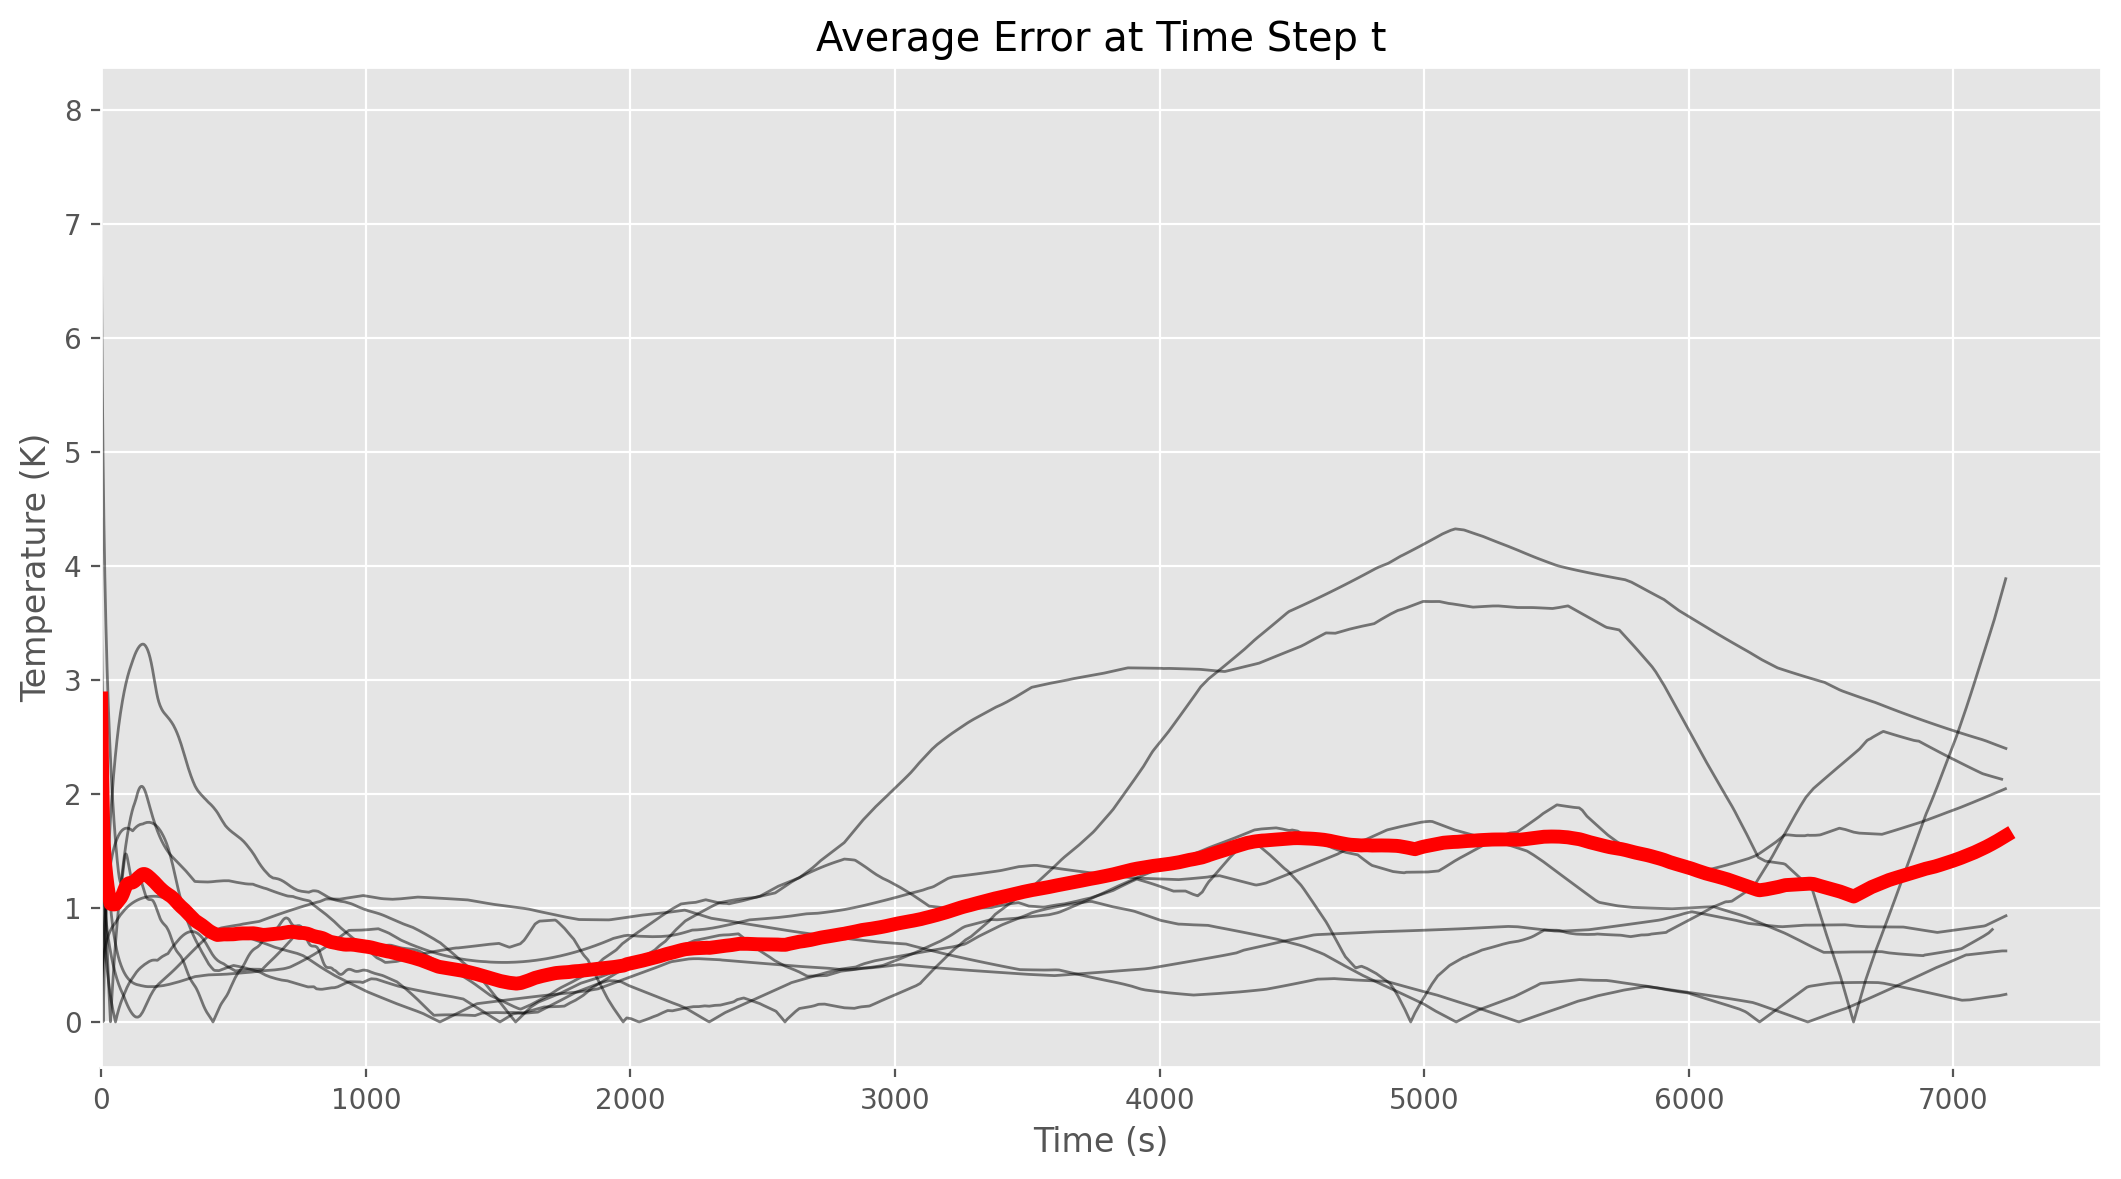

In [9]:
avg_error = plot_average_error(test_df, target=target)

<AxesSubplot:>

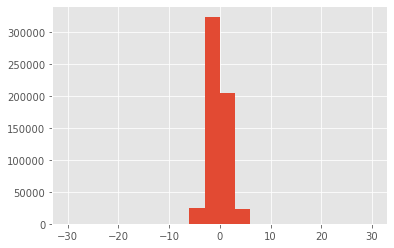

In [10]:
(test_df[target] - test_df[target+'_hat']).hist(bins=20, range=(-30, 30))

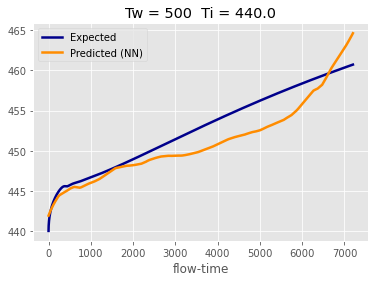

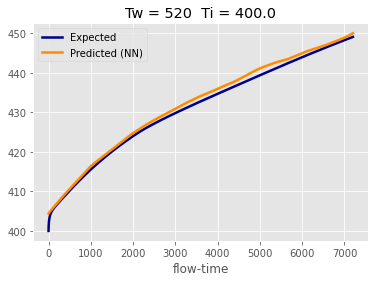

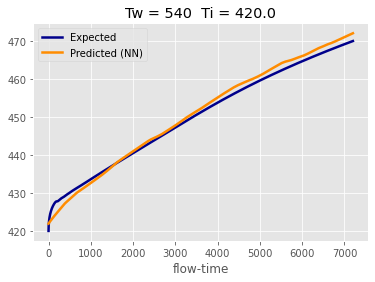

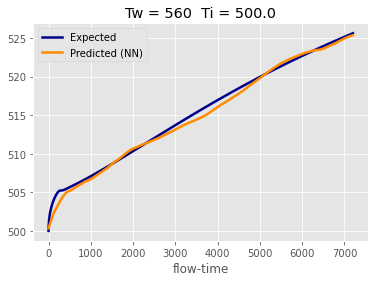

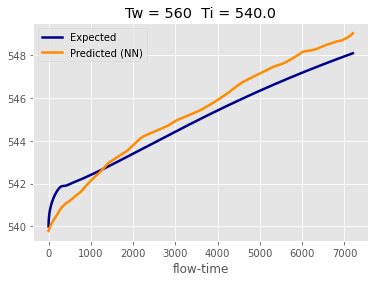

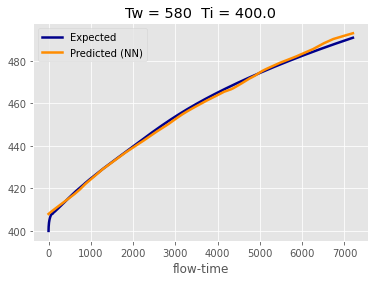

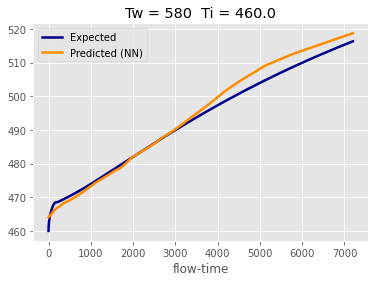

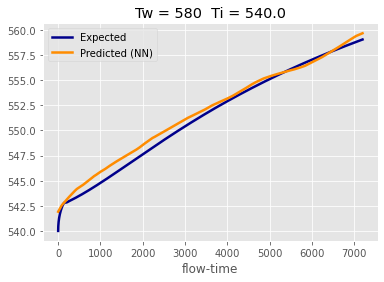

In [11]:
plot_test_results(test_df, model_type, target)

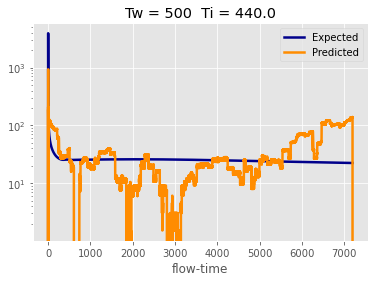

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


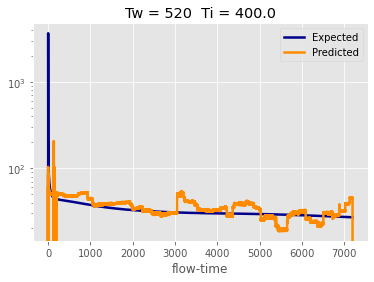

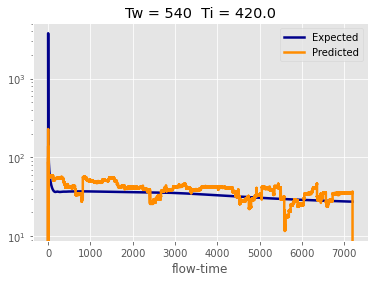

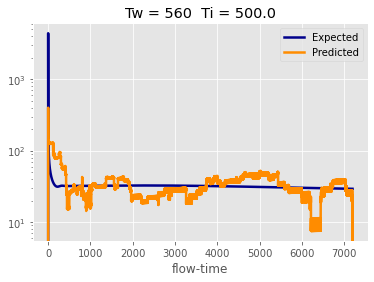

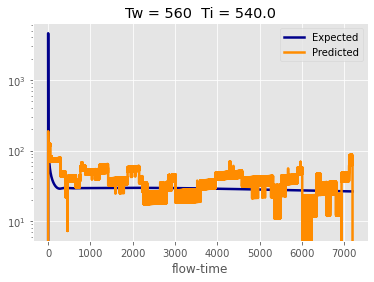

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


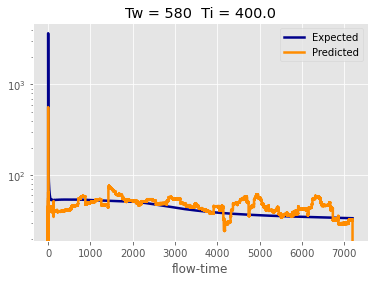

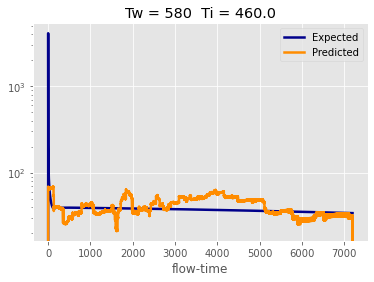

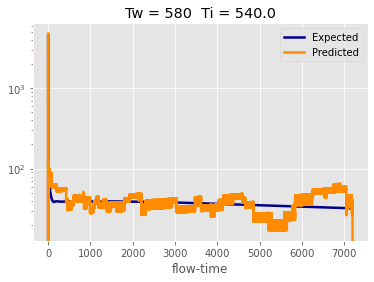

In [12]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(test_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(test_df, plot=True)

In [13]:
print(rmse)

57.0894837075305


In [14]:
print(r2)

-0.03155115812091669
